In [1]:
import flim
from flim.experiments import utils
from flim.models.lcn import LCNCreator

import torch

import numpy as np

import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

In [3]:
architecture = utils.load_architecture('arch.json')

In [4]:
# the images are in LAB color space and have
images, markers = utils.load_images_and_markers('images_and_markers')

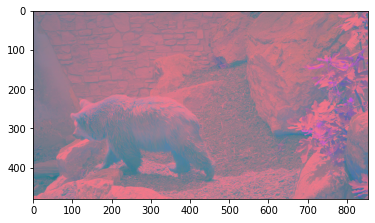

In [5]:
plt.imshow(images[0])

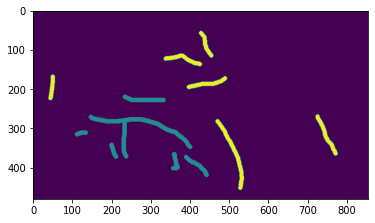

In [6]:
plt.imshow(markers[0])

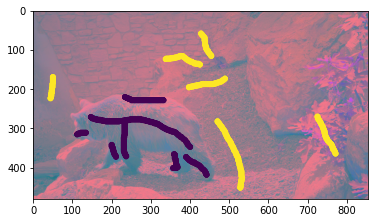

In [7]:
plt.imshow(images[0])

x, y = np.where(markers[0] != 0)

plt.scatter(y, x, s=1, c=markers[0, x, y])


In [8]:
# relabel_markers=True will set a new label for each connected component in the markers
creator = LCNCreator(architecture, images=images, markers=markers, relabel_markers=False, device=device)

In [9]:
# Build the feature extractor using FLIM
creator.build_model()

Building m_norm
Building conv
Building layer...
Epoch 0: loss = 2.0344114303588867, accuracy = 0.7781501340482574
Epoch 1: loss = 2.038426637649536, accuracy = 0.7783512064343163
Epoch 2: loss = 2.0425171852111816, accuracy = 0.7783512064343163
Epoch 3: loss = 2.0467071533203125, accuracy = 0.7785522788203754
Epoch 4: loss = 2.0510036945343018, accuracy = 0.7780831099195711
Epoch 5: loss = 2.055405855178833, accuracy = 0.7780831099195711
Epoch 6: loss = 2.0599119663238525, accuracy = 0.7772117962466488
Epoch 7: loss = 2.0645177364349365, accuracy = 0.7770107238605898
Epoch 8: loss = 2.069220781326294, accuracy = 0.7766085790884718
Epoch 9: loss = 2.074018955230713, accuracy = 0.7756702412868632
Epoch 10: loss = 2.0789108276367188, accuracy = 0.7756702412868632
Epoch 11: loss = 2.0838961601257324, accuracy = 0.7744638069705094
Epoch 12: loss = 2.088975191116333, accuracy = 0.7739276139410187
Epoch 13: loss = 2.094146728515625, accuracy = 0.7723190348525469
Epoch 14: loss = 2.09940981864

In [10]:
# model is a PyTorch Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
model = creator.get_LIDSConvNet()

In [11]:
# input mut be a PyTorch Tensor with shape (N, C, H, W)
x = torch.from_numpy(images).permute(0, 3, 1, 2).float().to(device)

In [12]:
features = model.forward(x)

In [13]:
print(features.size())

torch.Size([1, 64, 480, 854])


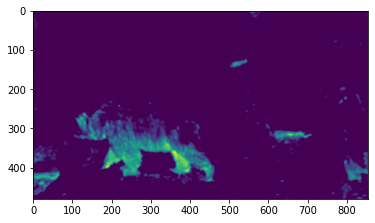

In [14]:
plt.imshow(features[0, 0, :].detach().cpu())